In [1]:
import torch

from pathlib import Path
import os 
BASE_DIR = Path(os.getcwd()).parent

SECRETS = BASE_DIR / "SECRETS" / "wandb.secret"
# open SECRETS
with open(SECRETS, "r") as f:
    API_key = f.read().strip()

    
import wandb

wandb.login(key=API_key)
wandb.init(project="data-to-concept") #, name="run-name")


wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /n/home04/rrinberg/.netrc
wandb: Currently logged in as: royrinberg (harvardml) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


In [2]:
# construct a DAG, depth = L
# the rules are : each parent can have multiple children,
# each child can have multiple parents

# assign a unique string to each node 

# plot this 

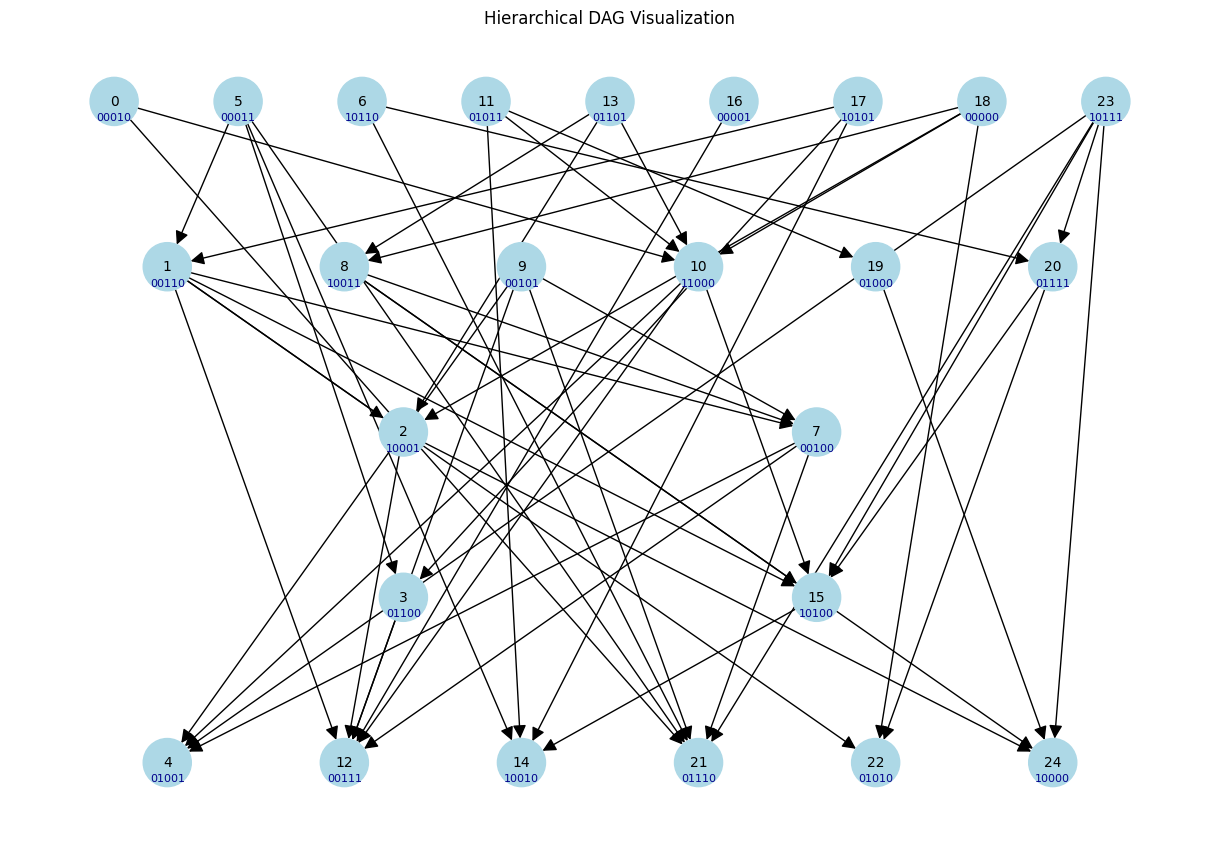

In [3]:
from unlearning import synthetic_data
# Example Usage with the previously generated DAG:
from importlib import reload 
reload(synthetic_data)
L = 5
N = 25
C = 5
seed = 42

dag = synthetic_data.generate_dag(L, N, C, seed)
synthetic_data.visualize_dag_layers(dag)




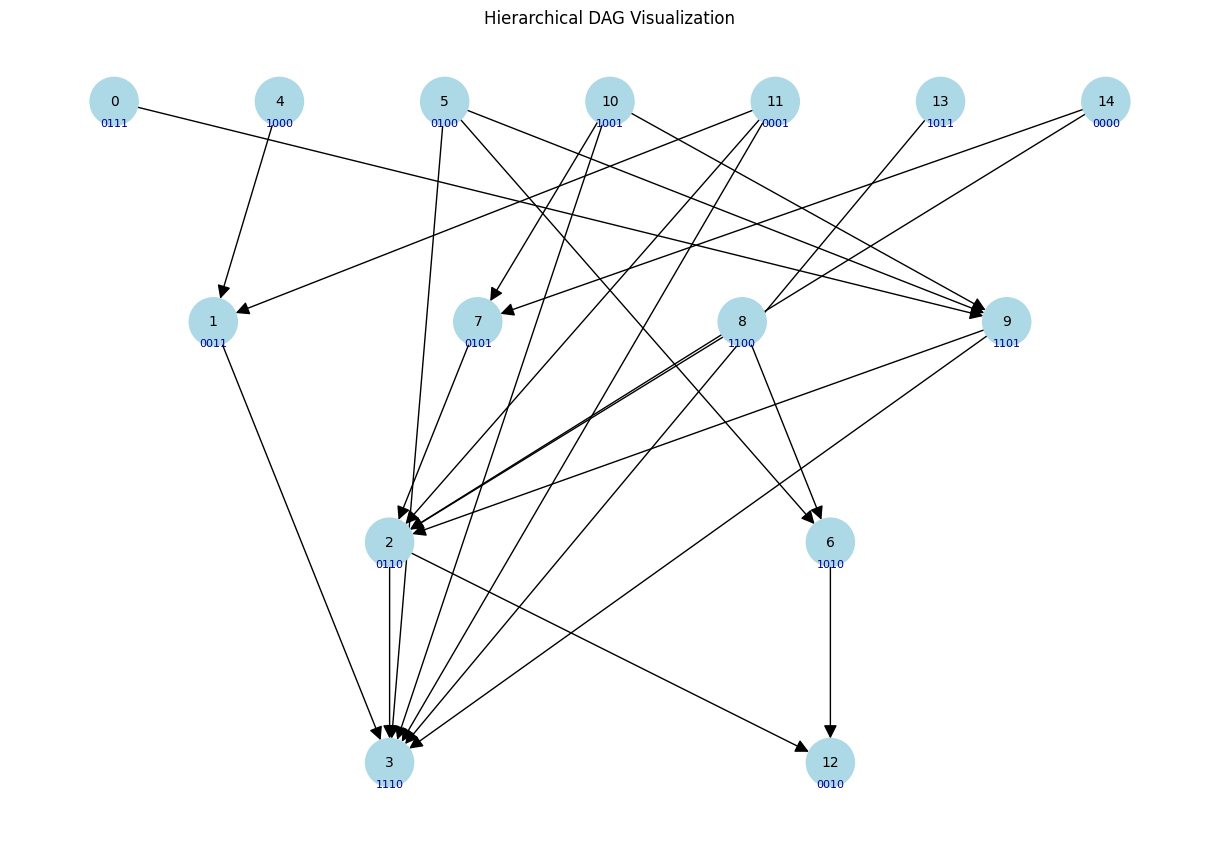

In [4]:
reload(synthetic_data)

L = 4
N = 15
C = 3
seed = 42

dag = synthetic_data.generate_dag(L, N, C, seed)
synthetic_data.visualize_dag_layers(dag)



nodes = list(dag.nodes())


subtrees = synthetic_data.compute_all_subtrees(dag)
# compute subtree of node 3



In [5]:
node_to_check = 3  # Example node to check

node_ = nodes[node_to_check]
node_ = 5

print("node_to_check:", node_)
bfs = synthetic_data.bfs_subtree_ordering(dag, node_)
print(bfs)

print("node_to_check:", node_)
bfs = synthetic_data.bfs_subtree_ordering(dag, node_)
print(bfs)

dfs = synthetic_data.dfs_subtree_ordering(dag, node_)
print("DFS Order for node", node_, ":", dfs)

dfs = synthetic_data.dfs_subtree_ordering(dag, node_)
print("DFS Order for node", node_, ":", dfs)

node_to_check: 5
[9, 3, 6, 2, 12]
node_to_check: 5
[3, 6, 9, 12, 2]
DFS Order for node 5 : [9, 2, 12, 3, 6]
DFS Order for node 5 : [6, 12, 9, 2, 3]


In [6]:
# goal create a dag batch
device_type  ="cuda"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# choose a random node from the DAG to start the batch
# generate subtree from that node
import numpy as np 
"""
Two ways I see to generate data: feed it subtrees, have it learn the tree

feed it subtrees,but train it on the next node in the BFS subtree
"""
reload(synthetic_data)
synthetic_data.get_dag_batch(dag, block_size=1000, batch_size=256, device_type=device_type)

(tensor([[ 2,  3,  2,  ...,  2, 12,  3],
         [10,  9,  3,  ..., 12, 11, 12],
         [12, 14,  3,  ...,  6,  5,  1],
         ...,
         [ 2,  3,  8,  ..., 11,  3,  1],
         [ 2, 12,  3,  ..., 14,  1,  3],
         [ 7, 12,  3,  ...,  2,  5,  3]], device='cuda:0'),
 tensor([[ 3,  2, 12,  ..., 12,  3,  6],
         [ 9,  3,  2,  ..., 11, 12,  6],
         [14,  3,  2,  ...,  5,  1,  3],
         ...,
         [ 3,  8,  3,  ...,  3,  1,  9],
         [12,  3,  9,  ...,  1,  3,  4],
         [12,  3,  2,  ...,  5,  3,  1]], device='cuda:0'))

In [7]:

synthetic_data.bfs_subtree_ordering(dag, 10)



[7, 9, 3, 2, 12]

In [8]:

# Print the subtrees (descendants) of each node
print("\nSubtrees (Descendants) per Node:")
for node, descendants in subtrees.items():
    print(f"{node}: {sorted(descendants)}")


Subtrees (Descendants) per Node:
3: []
12: []
2: [12]
9: [2, 3, 12]
0: [2, 3, 9, 12]
1: [3]
4: [1, 3]
6: [12]
5: [2, 3, 6, 9, 12]
7: [2, 12]
10: [2, 3, 7, 9, 12]
11: [1, 2, 3, 12]
13: [3]
14: [2, 7, 12]
8: [2, 6, 12]
